# Analysis of Hosted Game Data

In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data = pd.read_csv('data.csv', sep='\t')

In [3]:
data.head()

,HG Story Title,Author,Genre,Subgenre (if applicable),Word Count,# of Omnibus Ratings,Omnibus Rating,# of Steam Reviews,% of Positive Steam Reviews,# of Google Reviews,# of GPS Installs,GPS Score,Release Date,Price,Free?
0,"Popcorn, Soda�Murder?",Pauzle,Mystery,NaN,23000,65,4.1,NaN,NaN,1229.0,100k+,3.6,3/4/2010,$1.99,Yup
1,The Nightmare Maze,Alex Livingston,Horror,Puzzle,5200,29,4.0,NaN,NaN,1069.0,50k+,3.5,6/17/2010,$0.99,Yup
2,What Happened Last Night?,Kie Brooks,Mystery,Humor,4900,134,3.9,NaN,NaN,753.0,50k+,3.1,7/19/2010,$0.99,Yup
3,Paranoia,Kie Brooks,Puzzle,NaN,5800,180,3.9,NaN,NaN,1139.0,50k+,3.4,4/16/2011,$0.99,Yup
4,Imprisoned,Myth Thrazz,Fantasy,Puzzle,40000,358,4.2,NaN,NaN,2211.0,100k+,3.6,4/21/2011,$0.99,Yup


## 1. How many games have been released each year?

In [4]:
import datetime

In [5]:
# just converting dates to a standard format
release_dates = pd.to_datetime(data['Release Date'])

In [6]:
data['Release Date'] = release_dates

In [27]:
date_group = data.groupby([data['Release Date'].dt.year]).count()

In [28]:
date_group

,HG Story Title,Author,Genre,Subgenre (if applicable),Word Count,# of Omnibus Ratings,Omnibus Rating,# of Steam Reviews,% of Positive Steam Reviews,# of Google Reviews,# of GPS Installs,GPS Score,Release Date,Price,Free?
Release Date,,,,,,,,,,,,,,,
2010,3,3,3,2,3,3,3,0,0,3,3,3,3,3,3
2011,10,10,10,8,10,10,10,1,1,10,10,10,10,10,10
2012,3,3,3,2,3,3,3,0,0,3,3,3,3,3,3
2013,5,5,5,3,5,5,5,1,1,5,5,5,5,5,5
2014,13,13,13,7,13,13,13,3,3,11,11,11,13,13,13
2015,17,17,17,11,17,17,17,5,5,17,17,17,17,17,17
2016,22,22,22,15,22,22,22,10,10,22,22,22,22,22,22
2017,16,16,16,12,16,16,16,7,6,16,16,16,16,16,16
2018,25,25,25,15,25,25,25,15,14,25,25,25,25,25,25


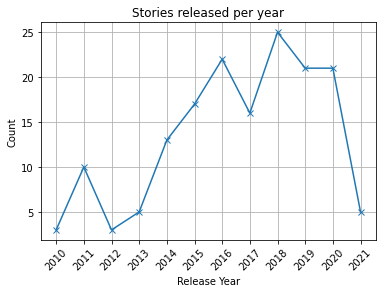

In [35]:
plt.plot(date_group['Release Date'].index, date_group['HG Story Title'], marker='x')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Stories released per year')
plt.grid(True)
plt.xticks(date_group['Release Date'].index, rotation=45)
plt.show()

Overall, the trend is increasing until a peak in 2018. Data for 2021 is incomplete.

## 2. How many games have been released in each genre?

In [16]:
genre_group = data[['Genre', 'HG Story Title']].groupby('Genre').count()

In [17]:
genre_group

,HG Story Title
Genre,
Adventure,1
Crime,6
Fantasy,46
Historical,7
Horror,6
Humor,3
Mystery,11
Post-apocalyptic,6
Puzzle,6


In [18]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

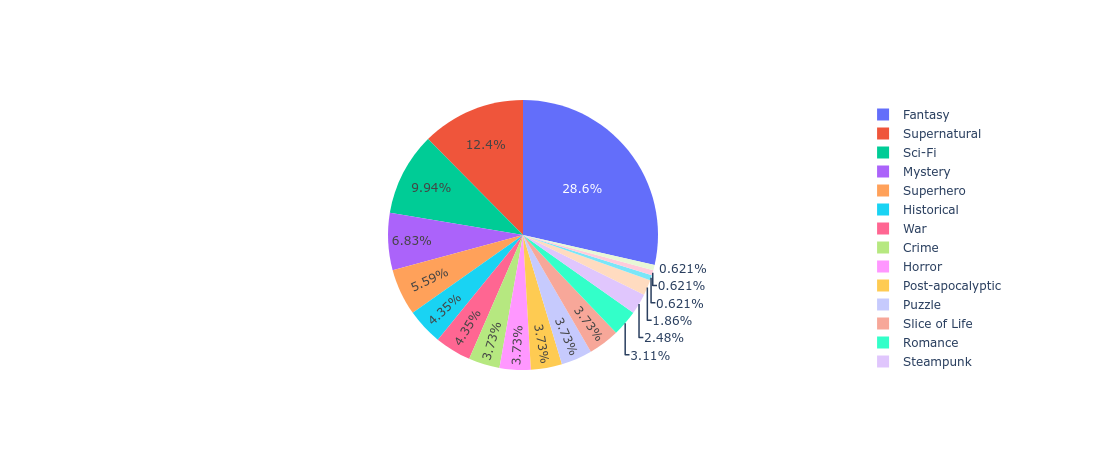

In [19]:
fig = go.Figure(data=[go.Pie(labels=genre_group.index, values=genre_group['HG Story Title'])])
iplot(fig)

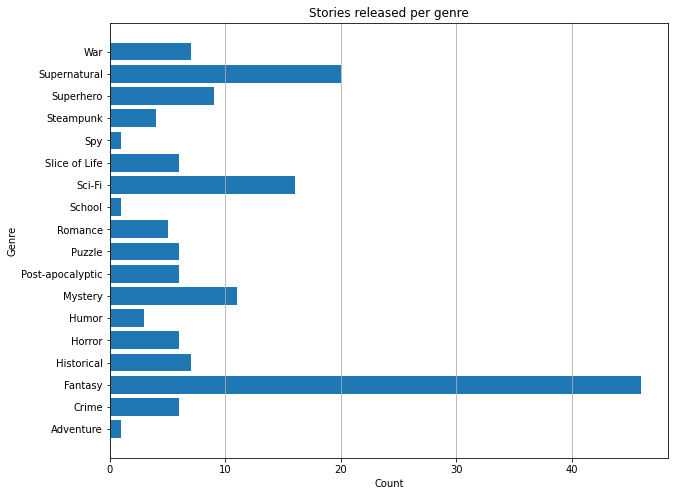

In [39]:
plt.figure(figsize=(10, 8))
plt.barh(genre_group.index, genre_group['HG Story Title'])
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Stories released per genre')
plt.grid(True, axis='x')
plt.show()

Fantasy is the most common genre, followed by Supernatural and Sci-Fi.

## 3. What are the most popular games?

### How do we measure popularity?

Maybe we can define "popularity" as omnibus reviews + Google reviews, since the Google downloads data is very coarse-grained.

As a sanity check, let's plot omnibus ratings vs google reviews, to see if they correlate.

In [40]:
data['Popularity'] = data['# of Omnibus Ratings'] + data['# of Google Reviews']

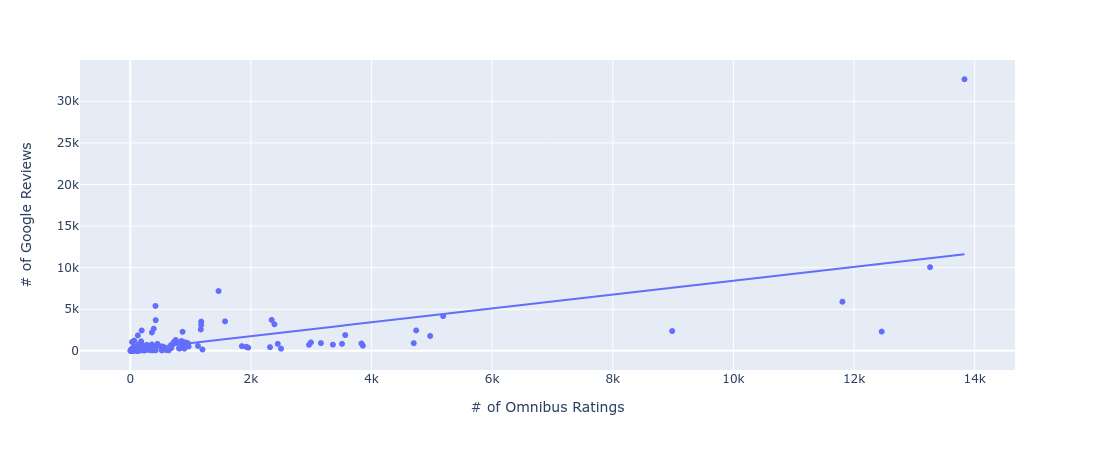

In [95]:
px.scatter(data, x='# of Omnibus Ratings', y='# of Google Reviews', hover_data=['HG Story Title'], trendline='ols')

This doesn't look so good but let's just calculate a correlation...

In [83]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

It turns out that some of the games don't have Google review data. Which are those games?

In [90]:
data[data['# of Google Reviews'].isna()]

,HG Story Title,Author,Genre,Subgenre (if applicable),Word Count,# of Omnibus Ratings,Omnibus Rating,# of Steam Reviews,% of Positive Steam Reviews,# of Google Reviews,# of GPS Installs,GPS Score,Release Date,Price,Free?,Popularity
27,Path of Light,Ivailo Daskalov,Fantasy,NaN,100000,14,4.4,NaN,NaN,NaN,NaN,NaN,2014-08-15,$0.99,Nope,NaN
33,Silent Gear,Lee Yuan,Sci-Fi,War,40000,169,4.2,NaN,NaN,NaN,NaN,NaN,2014-12-29,$1.99,Yup,NaN
143,Journey into Darkness,Jonathan Clark,Historical,Puzzle,110000,10,3.6,NaN,NaN,NaN,1k+,NaN,2020-05-21,$3.99,Nope,NaN


Alright, let's just remove those games from the data.

In [92]:
data_clean = data[~data['# of Google Reviews'].isna()]

In [99]:
results = sm.OLS(data_clean['# of Omnibus Ratings'], sm.add_constant(data_clean['# of Google Reviews'])).fit()

In [100]:
print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     # of Omnibus Ratings   R-squared:                       0.437
Model:                              OLS   Adj. R-squared:                  0.433
Method:                   Least Squares   F-statistic:                     121.1
Date:                  Mon, 07 Jun 2021   Prob (F-statistic):           3.31e-21
Time:                          18:26:39   Log-Likelihood:                -1400.9
No. Observations:                   158   AIC:                             2806.
Df Residuals:                       156   BIC:                             2812.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const         

That's a lot of numbers! Here I am attempting to discern the relationship between 

An important number here is **R-squared**. Basically, this shows the strength of the relationship between the two variables. It's 0.496, which is pretty decent. So there definitely is a relationship between the two popularity metrics. But I'm guessing the outlier kind of skews the results... What is the outlier, anyway? That seems to be by far the most popular game published by Hosted Games.

### Okay, but really, what are the most popular games?

In [67]:
data_popular = data.sort_values('Popularity', ascending=False)

In [69]:
data_popular.head(10)

,HG Story Title,Author,Genre,Subgenre (if applicable),Word Count,# of Omnibus Ratings,Omnibus Rating,# of Steam Reviews,% of Positive Steam Reviews,# of Google Reviews,# of GPS Installs,GPS Score,Release Date,Price,Free?,Popularity
74,The Great Tournament,Philip Kempton,Fantasy,Historical,190000,13831,4.7,21.0,90%,32649.0,500k+,4.7,2017-03-03,$4.99,Yup,46480.0
113,Life of a Mercenary,Philip Kempton,Fantasy,Historical,340000,13260,4.6,6.0,100%,10060.0,100k+,4.4,2018-12-18,$3.99,Yup,23320.0
92,Wayhaven Chronicles: Book One,Mishka Jenkins,Supernatural,Romance,440000,11807,4.8,238.0,95%,5909.0,100k+,4.7,2018-03-08,$4.99,Nope,17716.0
141,Wayhaven Chronicles: Book Two*,Mishka Jenkins,Supernatural,Romance,790000,12458,4.9,140.0,99%,2319.0,10k+,4.9,2020-05-07,$6.99,Nope,14777.0
127,Hero or Villain: Genesis,Adrao,Superhero,NaN,330000,8984,4.6,25.0,68%,2380.0,100k+,4.2,2019-09-19,$3.99,Nope,11364.0
71,Zombie Exodus: Safe Haven,Jim Dattilo,Supernatural,Post-apocalyptic,1100000,5187,4.8,129.0,89%,4176.0,100k+,4.4,2016-10-28,$4.99,Nope,9363.0
8,Zombie Exodus,Jim Dattilo,Supernatural,Post-apocalyptic,700000,1463,4.7,138.0,89%,7191.0,100k+,4.3,2011-12-04,$1.99,Nope,8654.0
134,The War for the West,Lucas Zaper,Fantasy,NaN,490000,4740,4.8,43.0,81%,2458.0,50k+,4.5,2019-11-14,$6.99,Nope,7198.0
133,Breach: The Archangel Job,Michael Maxwell and S. Ben Luigi,Crime,NaN,820000,4972,4.9,53.0,94%,1792.0,10k+,4.6,2019-11-14,$6.99,Nope,6764.0
42,Samurai of Hyuga,Devon Connell,Fantasy,Historical,140000,2344,4.8,41.0,82%,3719.0,100k+,4.5,2015-07-17,$3.99,Nope,6063.0


The outlier that we saw earlier was *The Great Tournament*, which is the most popular Hosted Game.

By most metrics, Philip Kempton's The Great Tournament and Life of a Mercenary are the two most popular Hosted Games. Congrats I guess.

## 4. What factors relate to the popularity of a game?

### a) How does word count relate to popularity?

Let's do another linear regression!

In [106]:
results = sm.OLS(data_clean['Popularity'], sm.add_constant(data_clean['Word Count'])).fit()

In [107]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Popularity   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     14.03
Date:                Mon, 07 Jun 2021   Prob (F-statistic):           0.000252
Time:                        18:28:25   Log-Likelihood:                -1553.6
No. Observations:                 158   AIC:                             3111.
Df Residuals:                     156   BIC:                             3117.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        762.4819    497.399      1.533      0.1

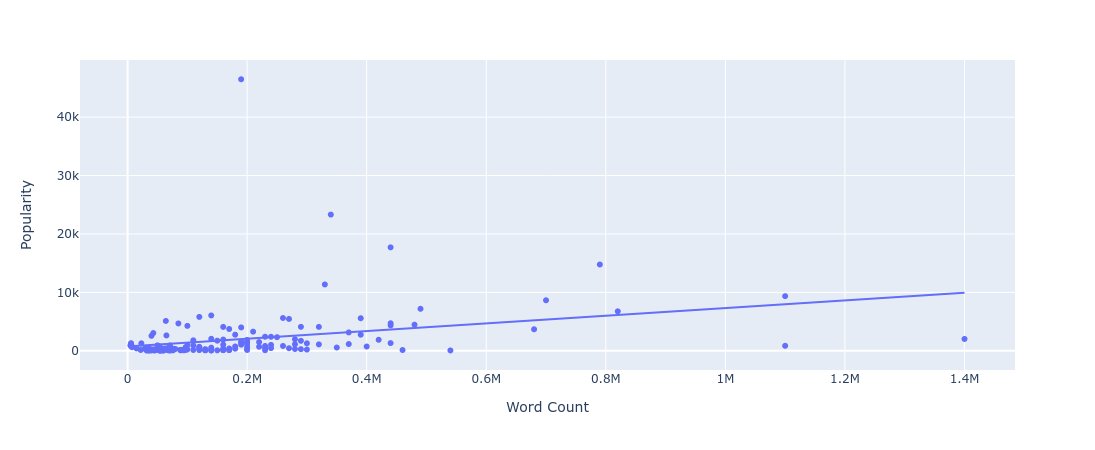

In [108]:
px.scatter(data_clean, x='Word Count', y='Popularity', hover_data=['HG Story Title'], trendline='ols')

There's definitely a positive relationship between word count and popularity, but the R^2 between word count and popularity is about 0.08, which is... very weak.

What happens if we remove The Great Tournament?

In [109]:
data_no_outliers = data_clean[data_clean['HG Story Title'] != 'The Great Tournament']

In [110]:
results = sm.OLS(data_no_outliers['Popularity'], sm.add_constant(data_no_outliers['Word Count'])).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Popularity   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     37.05
Date:                Mon, 07 Jun 2021   Prob (F-statistic):           8.70e-09
Time:                        18:29:50   Log-Likelihood:                -1468.5
No. Observations:                 157   AIC:                             2941.
Df Residuals:                     155   BIC:                             2947.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        471.8026    308.456      1.530      0.1

Now, the R^2 improves to 0.193, which is... better?

The regression equation is $Popularity = 0.066*WordCount + 471.8$

This means that, for example, the expected popularity of a 500k-word story would be about 3800.

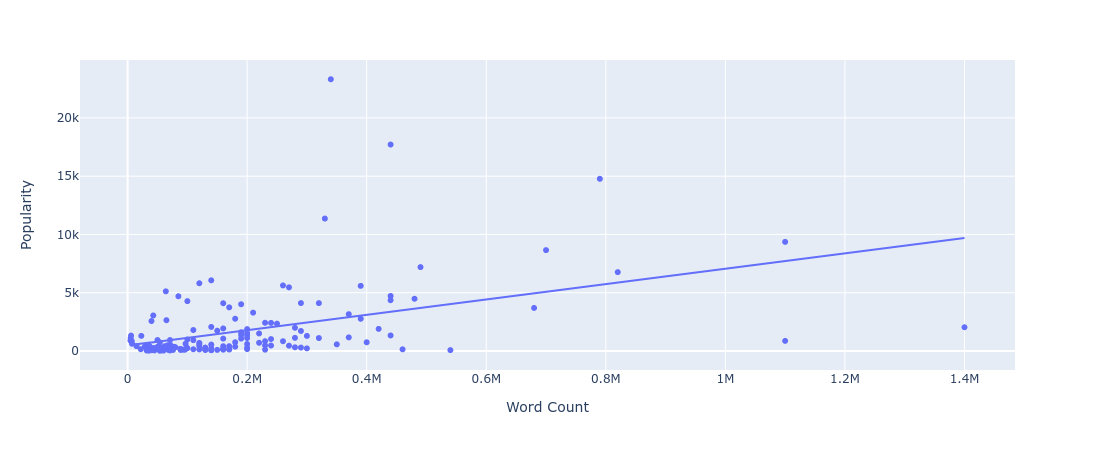

In [111]:
px.scatter(data_no_outliers, x='Word Count', y='Popularity', hover_data=['HG Story Title'], trendline='ols')

### How does release date relate to popularity?

We might expect earlier released games to be more popular, just because they've had more time to acquire readers. But we might also expect later released games to be more popular, because of greater visibility for HG in more recent years, and the more recent release of the omnibus app. Or maybe there is no relation at all. Which hypothesis is true?

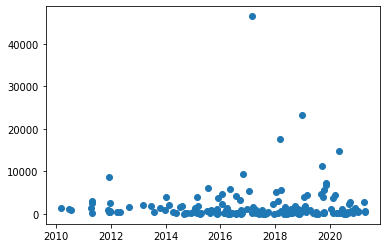

In [41]:
plt.scatter(data['Release Date'], data['Popularity'])

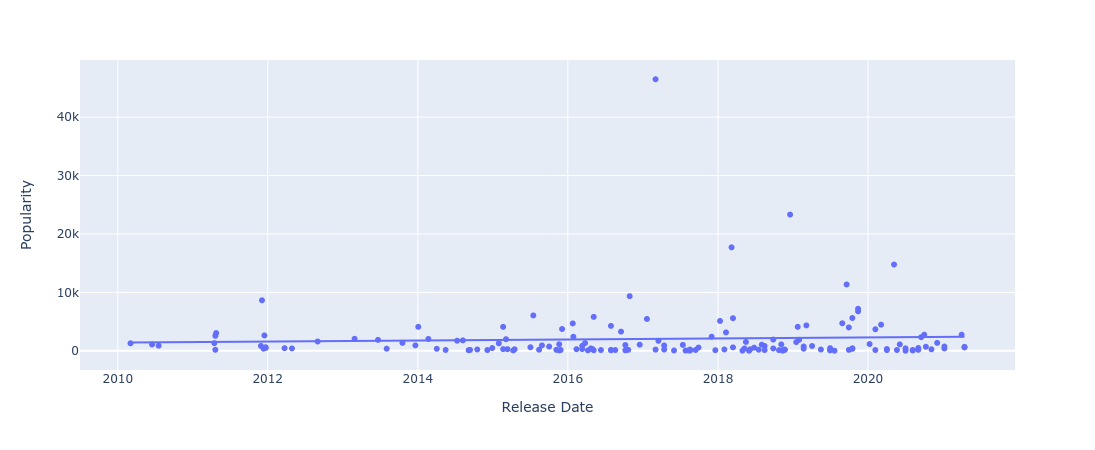

In [97]:
# okay that wasn't very helpful... but what is the outlier?
px.scatter(data, x='Release Date', y='Popularity', hover_data=['HG Story Title'], trendline='ols')

It doesn't look like there's much of a relationship between popularity and release date.

### How does genre (and subgenre) relate to popularity?

Let's plot the average popularity per genre:

In [114]:
genre_pop_group = data_clean[['Genre', 'Popularity']].groupby('Genre').mean()

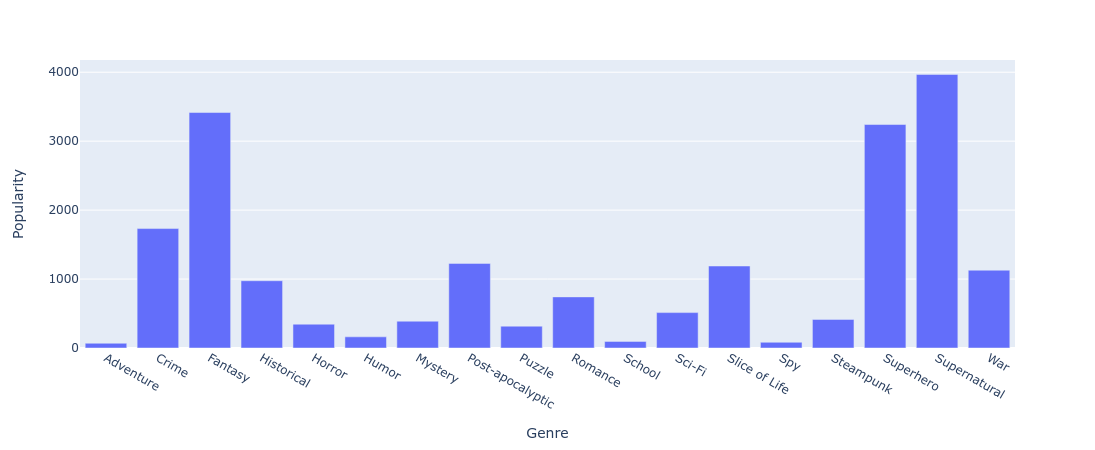

In [123]:
px.bar(genre_pop_group, x=genre_pop_group.index, y='Popularity')

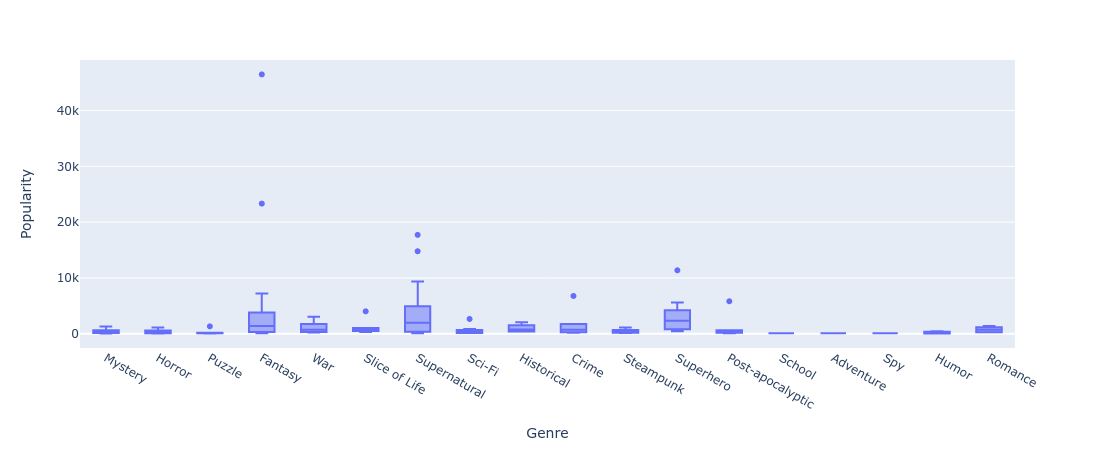

In [125]:
#Let's do a box plot with error bars...
px.box(data_clean, x='Genre', y='Popularity', hover_data=['HG Story Title'])

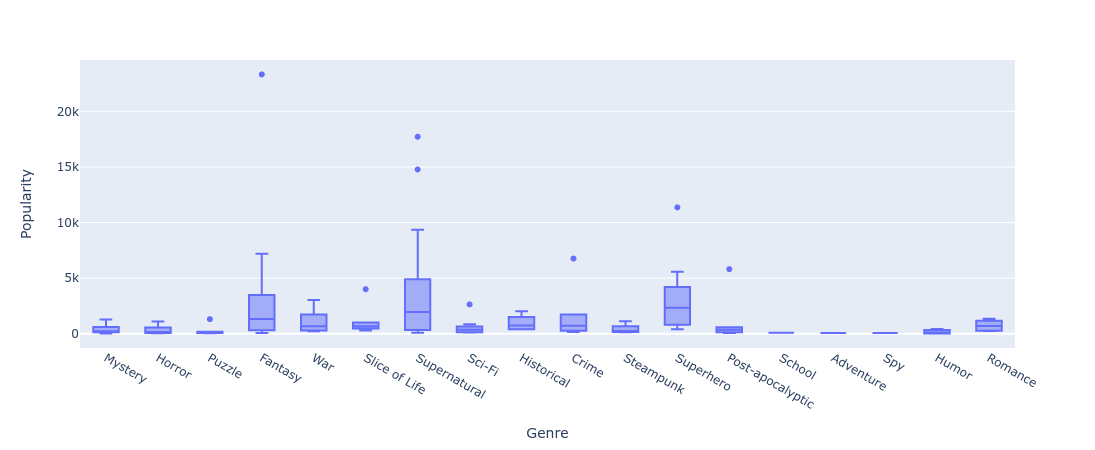

In [126]:
#Let's do a box plot with The Great Tournament removed...
px.box(data_no_outliers, x='Genre', y='Popularity', hover_data=['HG Story Title'])

Superatural, Fantasy, and Superhero are the most popular genres on average. They are also the most popular genres in total, so writers' interests and readers' interests seem to overlap for the most part. Interestingly, it seems that Superhero has the highest floor of popularity: the least popular Superhero game has a popularity of 419, which is the highest minimum popularity of any genre!

### Can we create a super-model that predicts popularity using Word Count, Genre, and Free?

We'll introduce dummy variables for all of the genres, as well as "Free?".

In [178]:
# 1. Create categorical variables to represent genre inclusions
genre_cols = []
genre_cols_quoted = []
for genre in set(data['Genre']):
    data['is_' + genre] = [int(x) for x in (data['Genre'] == genre)]
    genre_cols_quoted.append('"is_' + genre + '"')
    genre_cols.append('is_'+genre)

In [188]:
data['is_free'] = [int(x) for x in (data['Free?'] == 'Yup')]

In [199]:
data_clean = data[~data['# of Google Reviews'].isna()]
data_clean_X = data_clean[['Word Count', 'is_free'] + genre_cols]

data_no_outliers = data_clean[data_clean['HG Story Title'] != 'The Great Tournament']
data_noo_X = data_no_outliers[['Word Count', 'is_free'] + genre_cols]

In [197]:
results = sm.OLS(data_clean['Popularity'], sm.add_constant(data_clean_X)).fit()

In [198]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Popularity   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     2.128
Date:                Mon, 07 Jun 2021   Prob (F-statistic):            0.00673
Time:                        19:07:17   Log-Likelihood:                -1540.1
No. Observations:                 158   AIC:                             3120.
Df Residuals:                     138   BIC:                             3182.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -983.5624    

Now, what the heck does this mean?

- The 'coef' field for each genre basically represents how much popularity (in terms of Google + omnibus ratings) you gain/lose by using that genre. Note that the error ranges (the last two columns) are very large, due to the small sample size.

If we interpret the linear regression coeffients very literally...

- Every additional word gets a game between 0.004 and 0.012 additional ratings.
- If a game is free, it'll gain between ~1400 and ~5200 ratings.
- If a game is in the fantasy genre, it'll gain between 580 and 3800 ratings (this is likely inflated by The Great Tournament and Life of a Mercenary, which I did not remove for this regression).
- If a game is in the supernatural genre, it'll gain between 60 and 4300 ratings (this is barely significant at p<0.05, and would not be "significant" if a FDR correction is applied).
- If a game is in the superhero genre, it'll gain between -341 and 5643 ratings (this is "almost significant" in p-hacker terminology). 

None of the other conclusions are significant. Based on this analysis, we cannot conclusively say that, for example, puzzle or adventure or horror games will have a penalty to popularity, simply because there are too few games in those categories. Similarly, we can't say that school or post-apocalyptic games will have a bonus to popularity.

Now, what if we remove The Great Tournament?

In [200]:
results = sm.OLS(data_no_outliers['Popularity'], sm.add_constant(data_noo_X)).fit()

In [201]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Popularity   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     3.901
Date:                Mon, 07 Jun 2021   Prob (F-statistic):           1.42e-06
Time:                        19:22:03   Log-Likelihood:                -1451.4
No. Observations:                 157   AIC:                             2943.
Df Residuals:                     137   BIC:                             3004.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -511.8465    

These results actually look quite a bit better. Here's a summary:

- Every additional word gets a game between 0.005 and 0.009 additional ratings.
- If a game is free, it'll gain between 521 and 2868 ratings.
- If a game is in the fantasy genre, it'll gain between 213 and 2217 ratings.
- If a game is in the supernatural genre, it'll gain between 971 and 3594 ratings.
- If a game is in the Superhero genre, it'll gain between 513 and 4134 ratings.

These are all the "significant" conclusions here. According to the regression coefficients, puzzle, adventure, sci-fi, horror, historical, and steampunk all have penalties, while war, school, and post-apocalyptic all have slight bonuses. But none of those are "significant", because the sample size is very, very small.